In [188]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import geopandas as gpd
import matplotlib as plt
%pylab inline
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
a = ["%.2d" % i for i in range(15)]
c = list(np.arange(94,100).astype(str))
year = c+a
year

['94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14']

In [3]:
# columns name some are 'ZIP', some are 'zip'
est = {}
for i in range(len(year)):
    path = 'data/zbp'+ year[i] + 'totals.txt'
    df = pd.read_csv(path)
    if 'zip' in df.columns:
        est[year[i]] = df[['zip','est']]
    else:
        est[year[i]] = df[['ZIP','EST']]

In [4]:
# see which are 'ZIP'
for i in year:
    if 'zip' in est[i].columns:
        print i
    else:
        print i,'ZIP'

94
95
96
97
98 ZIP
99 ZIP
00 ZIP
01 ZIP
02 ZIP
03
04
05
06
07
08
09
10
11
12
13
14


In [5]:
# change columns name into 'zip' and 'est', prepare for merge
for i in year[4:9]:
    est[i] = est[i].rename(columns = {'ZIP':'zip','EST':'est'})

In [6]:
#change columns name with year
for i in year:
    est[i] = est[i].rename(columns = {'est':'est'+i})

In [7]:
#merge data
data = pd.merge(est['94'],est['95'], on= 'zip', how = 'inner')
for i in year[2:]:
    data = pd.merge(data,est[i], on= 'zip', how = 'inner')   # outer will bring a lot NAN

In [8]:
data.head(3)

,zip,est94,est95,est96,est97,est98,est99,est00,est01,est02,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
0,1001,439,439,433,457,444,469,493,490,490,...,509,509,503,477,458,448,436,453,439,458
1,1002,450,467,487,500,490,558,563,587,566,...,589,582,596,584,571,570,558,572,572,560
2,1003,10,10,13,15,14,13,13,13,15,...,12,12,16,17,16,16,16,15,15,18


In [9]:
zipcode = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
zipcode.head(3)

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040


In [10]:
zipcode.rename(columns = {"postalCode" : 'zip'},inplace = True)

In [11]:
nyzip = zipcode[['geometry','zip']]
nyzip.head()

,geometry,zip
0,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [12]:
nyzip['zip'] = pd.to_numeric(nyzip['zip'], errors = 'coerce')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
nyzip.zip[0]

11372

In [14]:
data_and_zip = pd.merge(nyzip, data, on = 'zip', how = 'inner')
data_and_zip.head(3)

,geometry,zip,est94,est95,est96,est97,est98,est99,est00,est01,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
0,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1229,1236,1292,1309,1351,1376,1409,1408,...,1539,1527,1545,1538,1572,1629,1647,1724,1759,1768
1,POLYGON ((-73.71068374074007 40.75004039450917...,11004,194,188,176,192,194,186,189,204,...,225,226,238,227,233,229,222,241,241,250
2,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1422,1414,1335,1344,1344,1350,1350,1341,...,1441,1454,1488,1503,1475,1494,1488,1510,1539,1534


In [15]:
time_series = data_and_zip.iloc[:,2:]

In [16]:
time_series.head()

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
0,1229,1236,1292,1309,1351,1376,1409,1408,1463,1521,...,1539,1527,1545,1538,1572,1629,1647,1724,1759,1768
1,194,188,176,192,194,186,189,204,214,228,...,225,226,238,227,233,229,222,241,241,250
2,1422,1414,1335,1344,1344,1350,1350,1341,1398,1403,...,1441,1454,1488,1503,1475,1494,1488,1510,1539,1534
3,326,219,209,198,203,217,213,217,207,211,...,226,226,228,226,237,248,256,266,258,260
4,492,476,483,522,509,519,553,574,574,582,...,604,608,617,616,628,643,677,679,714,731


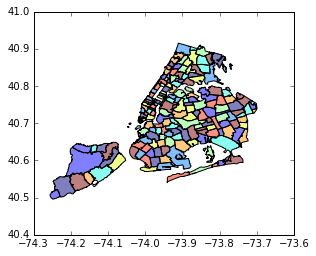

In [160]:
data_and_zip.iloc[:,:-5].plot()

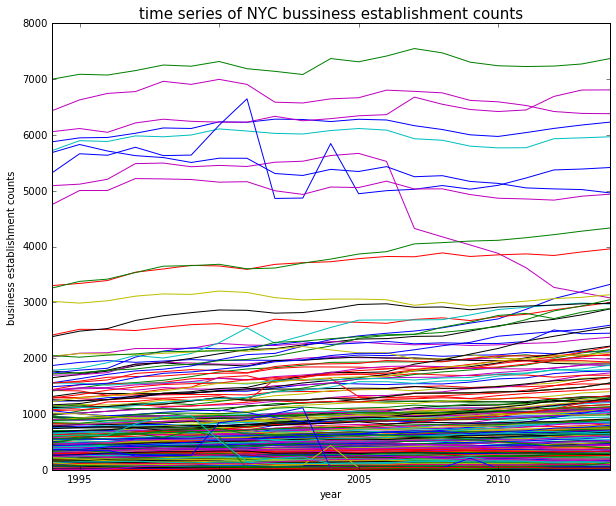

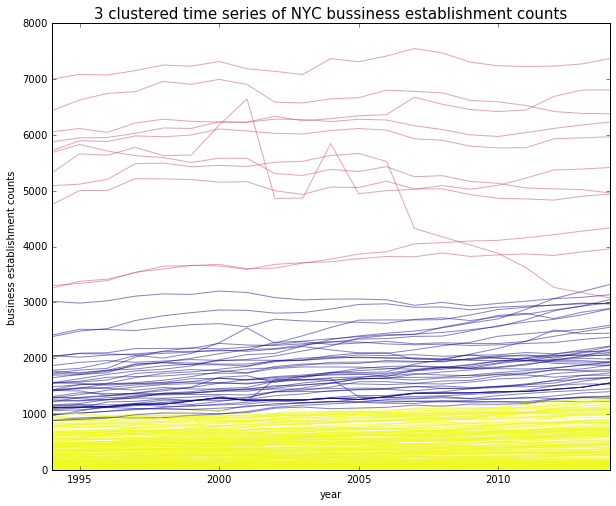

In [87]:
n = 3
clusters =KMeans(n_clusters= n).fit(time_series)
cmap = plt.cm.plasma(np.linspace(0,1,n))
clusters.labels_



#plot without clusters
plt.figure(figsize = (10,8))
for i in range(len(time_series)):
    t= clusters.labels_[i]
    plt.plot(np.arange(1994,2015) ,time_series.iloc[i])
    plt.title('time series of NYC bussiness establishment counts',fontsize =15)
    plt.ylabel('business establishment counts',fontsize =10)
    plt.xlabel('year',fontsize =10)
    plt.xlim(1994,2014)
    
#plot with clusters
plt.figure(figsize = (10,8))
for i in range(len(time_series)):
    t= clusters.labels_[i]
    plt.plot(np.arange(1994,2015) ,time_series.iloc[i], color=cmap[t][0:3],alpha = 0.5)
    plt.title('3 clustered time series of NYC bussiness establishment counts',fontsize =15)
    plt.ylabel('business establishment counts',fontsize =10)
    plt.xlabel('year',fontsize =10)
    plt.xlim(1994,2014)

In [78]:
data_and_zip['clusters_3'] = clusters.labels_
data_and_zip.head(3)

,geometry,zip,est94,est95,est96,est97,est98,est99,est00,est01,...,est07,est08,est09,est10,est11,est12,est13,est14,clusters_3,clusters_4
0,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1229,1236,1292,1309,1351,1376,1409,1408,...,1545,1538,1572,1629,1647,1724,1759,1768,2,3
1,POLYGON ((-73.71068374074007 40.75004039450917...,11004,194,188,176,192,194,186,189,204,...,238,227,233,229,222,241,241,250,0,0
2,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1422,1414,1335,1344,1344,1350,1350,1341,...,1488,1503,1475,1494,1488,1510,1539,1534,2,3


In [79]:
centroid = data_and_zip.groupby('clusters_3').mean()
centroid

,zip,est94,est95,est96,est97,est98,est99,est00,est01,est02,...,est06,est07,est08,est09,est10,est11,est12,est13,est14,clusters_4
clusters_3,,,,,,,,,,,,,,,,,,,,,
0,10717.679144,357.513369,362.411765,368.764706,377.203209,382.187166,385.689840,390.272727,388.262032,402.368984,...,419.299465,424.780749,429.187166,436.085561,445.828877,453.224599,463.497326,475.262032,484.732620,0.737968
1,10016.090909,5317.000000,5455.909091,5461.818182,5577.727273,5616.181818,5600.545455,5690.454545,5695.272727,5487.363636,...,5618.909091,5510.363636,5483.181818,5387.727273,5358.363636,5345.909091,5360.272727,5387.909091,5404.454545,1.818182
2,10781.222222,1461.044444,1490.733333,1518.533333,1564.600000,1595.022222,1619.777778,1657.844444,1669.133333,1711.577778,...,1805.288889,1822.688889,1840.177778,1857.666667,1897.377778,1929.866667,1970.955556,2013.400000,2052.244444,1.800000


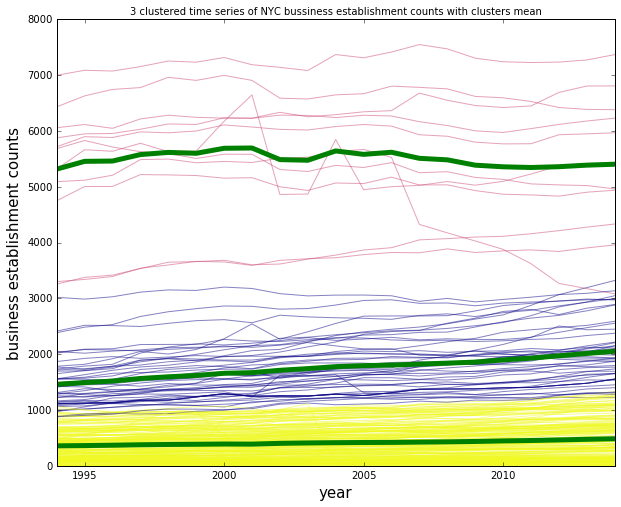

In [88]:
plt.figure(figsize = (10,8))
for i in range(len(time_series)):
    t= clusters.labels_[i]
    plt.plot(np.arange(1994,2015) ,time_series.iloc[i], alpha = 0.5, color=cmap[t][0:3])
    plt.title('3 clustered time series of NYC bussiness establishment counts with clusters mean',fontsize =10)
    plt.ylabel('business establishment counts',fontsize =15)
    plt.xlabel('year',fontsize =15)
    plt.xlim(1994,2014)
for i in range(n):
    plt.plot(np.arange(1994,2015) ,centroid.iloc[i,1:22],color = 'green',linewidth = 5)

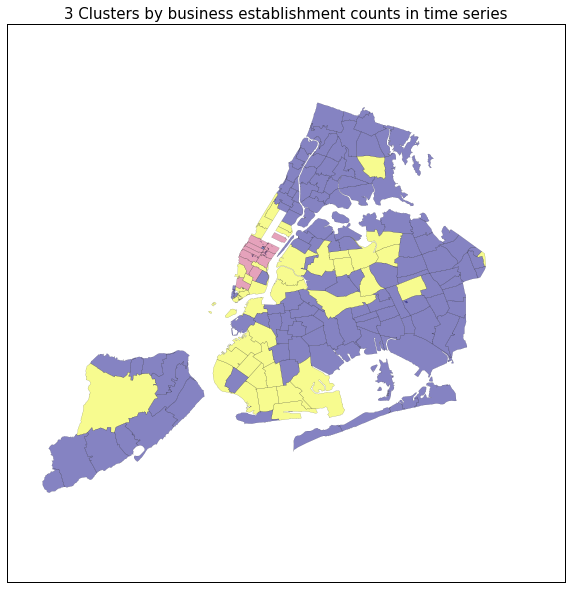

In [83]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
data_and_zip.plot(column='clusters_3',cmap = 'plasma',alpha=0.5,linewidth=0.1,ax=ax)
plt.title("3 Clusters by business establishment counts in time series",fontsize = 15)

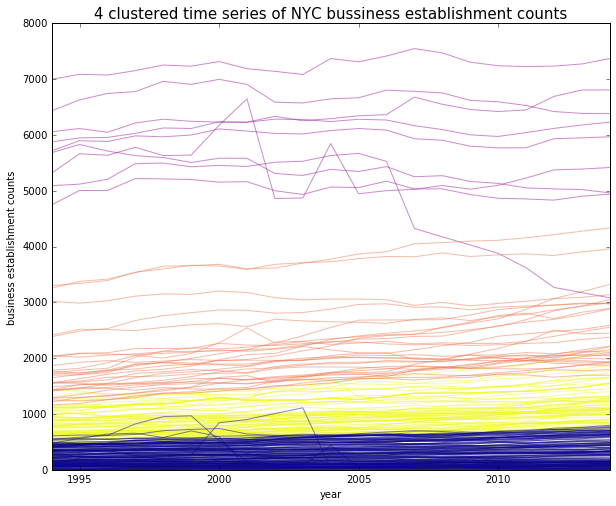

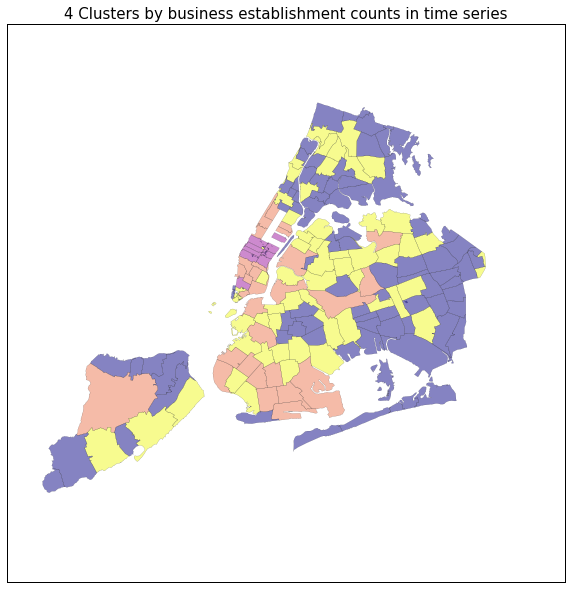

In [89]:
n = 4
clusters =KMeans(n_clusters= n).fit(time_series)
cmap = plt.cm.plasma(np.linspace(0,1,n))
clusters.labels_
data_and_zip['clusters_4'] = clusters.labels_

#plot with clusters
plt.figure(figsize = (10,8))
for i in range(len(time_series)):
    t= clusters.labels_[i]
    plt.plot(np.arange(1994,2015) ,time_series.iloc[i], color=cmap[t][0:3],alpha=0.5)
    plt.title('4 clustered time series of NYC bussiness establishment counts',fontsize =15)
    plt.ylabel('business establishment counts',fontsize =10)
    plt.xlabel('year',fontsize =10)
    plt.xlim(1994,2014)

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
data_and_zip.plot(column='clusters_4',cmap = 'plasma',alpha=0.5,linewidth=0.1,ax=ax)
plt.title("4 Clusters by business establishment counts in time series",fontsize = 15)

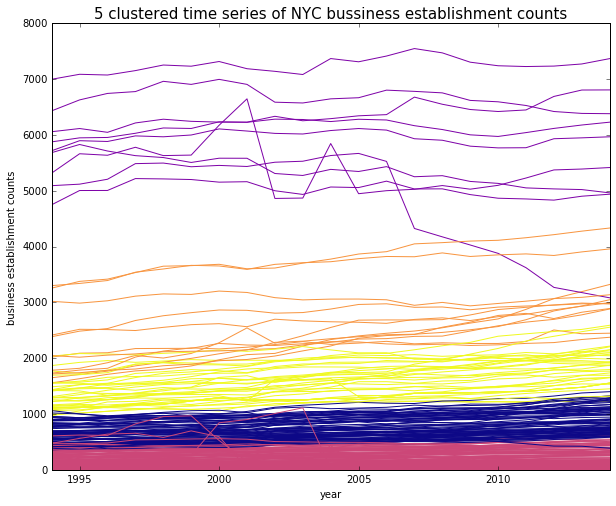

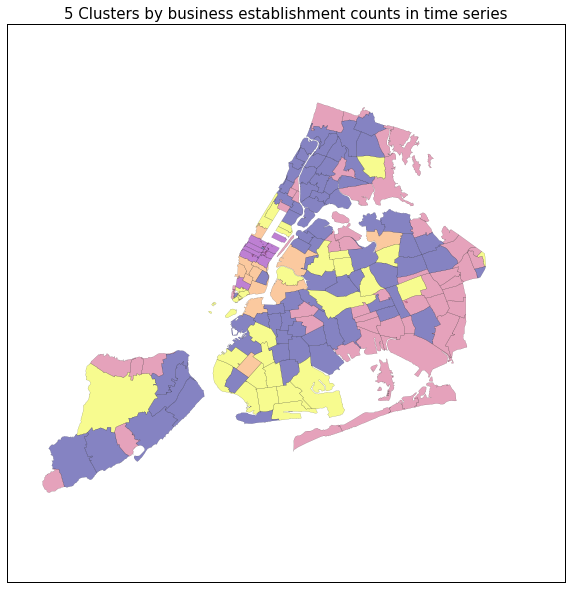

In [91]:
n = 5
clusters =KMeans(n_clusters= n).fit(time_series)
cmap = plt.cm.plasma(np.linspace(0,1,n))
clusters.labels_
data_and_zip['clusters_5'] = clusters.labels_

#plot with clusters
plt.figure(figsize = (10,8))
for i in range(len(time_series)):
    t= clusters.labels_[i]
    plt.plot(np.arange(1994,2015) ,time_series.iloc[i], color=cmap[t][0:3])
    plt.title('5 clustered time series of NYC bussiness establishment counts',fontsize =15)
    plt.ylabel('business establishment counts',fontsize =10)
    plt.xlabel('year',fontsize =10)
    plt.xlim(1994,2014)

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
data_and_zip.plot(column='clusters_5',cmap = 'plasma',alpha=0.5,linewidth=0.1,ax=ax)
plt.title("5 Clusters by business establishment counts in time series",fontsize = 15)

### from 3 maps above of different K(  K = 3, 4, 5) ,what I've learnt:
I clustered time series without standarization by 3 groups, 4 groups and 5 groups. 

It turns out that 3 clusters has clearer pattern in space.
As Manhattan has more business establishment, then part of Brooklyn, Queens and Bronx, basically where are close to Manhattan has second amount of business establishment.

While clusering by 4 groups and 5 groups makes the plot pattern less strong. Zipcode in each cluster looks like more scattered and mixed in space.

### standarize time series

In [107]:
time_series_stand = time_series.copy()

In [110]:
mean = time_series_stand.iloc[0].mean()
std = time_series_stand.iloc[0].std()
mean,std

(1495.047619047619, 161.19071815414068)

In [112]:
for i in range(len(time_series_stand)):
    mean = time_series_stand.iloc[i].mean()
    std = time_series_stand.iloc[i].std()
    time_series_stand.iloc[i] = (time_series_stand.iloc[i] - mean)/ std
    

In [113]:
time_series_stand

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
0,-1.650515,-1.607088,-1.259673,-1.154208,-0.893647,-0.738551,-0.533825,-0.540029,-0.198818,0.161004,...,0.272673,0.198227,0.309896,0.266469,0.477400,0.831018,0.942687,1.420382,1.637516,1.693350
1,-0.974535,-1.248013,-1.794968,-1.065695,-0.974535,-1.339172,-1.202433,-0.518739,-0.062943,0.575171,...,0.438432,0.484012,1.030967,0.529592,0.803069,0.620751,0.301694,1.167706,1.167706,1.577923
2,-0.118051,-0.234030,-1.379327,-1.248850,-1.248850,-1.161866,-1.161866,-1.292342,-0.465989,-0.393502,...,0.157401,0.345867,0.838780,1.056241,0.650313,0.925765,0.838780,1.157723,1.578149,1.505662
3,3.212291,-0.444253,-0.785986,-1.161892,-0.991026,-0.512600,-0.649293,-0.512600,-0.854333,-0.717639,...,-0.205040,-0.205040,-0.136693,-0.205040,0.170867,0.546773,0.820159,1.161892,0.888506,0.956853
4,-1.332578,-1.549090,-1.454366,-0.926619,-1.102534,-0.967215,-0.507127,-0.222956,-0.222956,-0.114700,...,0.183004,0.237132,0.358920,0.345388,0.507772,0.710751,1.170839,1.197903,1.671522,1.901566
5,-1.459619,-1.298191,-1.369219,-1.188420,-0.807449,-0.846192,-0.833278,-0.736421,-0.290878,-0.090707,...,0.393578,0.445235,0.277349,0.561463,0.496892,0.806834,0.968262,1.168433,1.723747,1.788318
6,-0.189661,-0.189661,-0.664682,-1.212784,-1.103164,-1.432025,-0.847383,-0.481982,-1.212784,-1.139704,...,0.394981,0.577682,0.248821,0.285361,0.248821,0.577682,1.454645,1.454645,1.600806,1.783507
7,-2.005640,-1.194027,-0.738385,-1.179788,-0.852295,-0.482086,-0.695668,-0.638713,-0.667190,-0.652952,...,0.685497,0.528870,0.785169,0.358005,0.614303,0.728214,1.326244,0.984513,1.639498,1.440155
8,-1.554103,-1.484591,-1.345565,-0.963246,-0.789465,-0.407145,-0.163851,-0.998002,-0.511414,-0.163851,...,0.531275,0.287981,0.183712,0.253224,0.148956,0.774569,1.156888,1.052619,1.539208,2.130065
9,-1.528453,-1.519285,-1.445940,-1.500948,-1.170897,-0.914190,-0.675820,-0.556634,-0.024885,0.204318,...,0.882757,0.818580,0.690227,0.552705,0.818580,0.846084,1.020278,0.772740,1.121127,1.111959


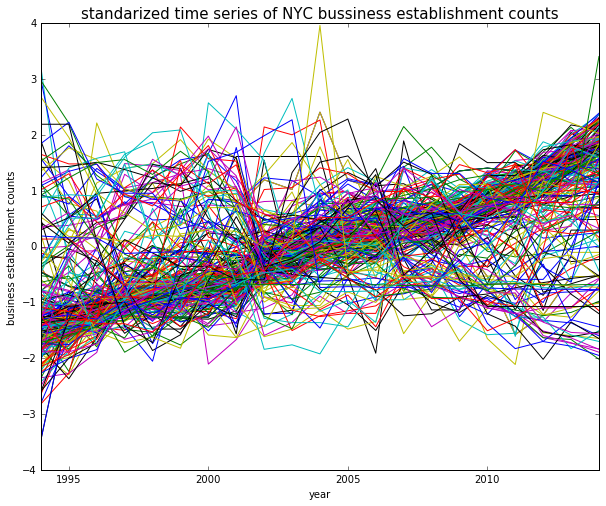

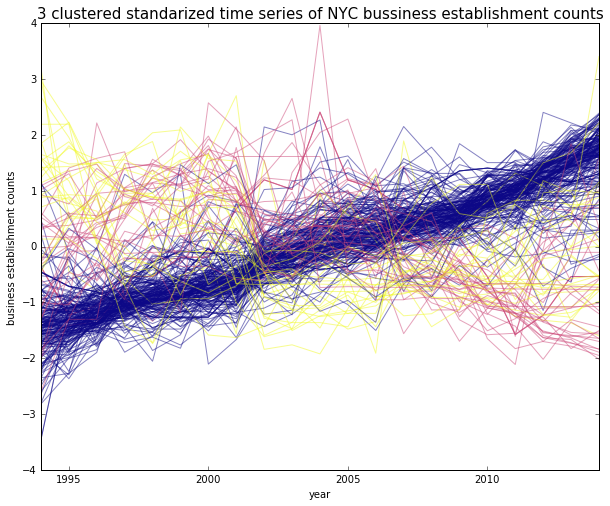

In [116]:
n = 3
clusters =KMeans(n_clusters= n).fit(time_series_stand)
cmap = plt.cm.plasma(np.linspace(0,1,n))
clusters.labels_



#plot without clusters
plt.figure(figsize = (10,8))
for i in range(len(time_series)):
    t= clusters.labels_[i]
    plt.plot(np.arange(1994,2015) ,time_series_stand.iloc[i])
    plt.title('standarized time series of NYC bussiness establishment counts',fontsize =15)
    plt.ylabel('business establishment counts',fontsize =10)
    plt.xlabel('year',fontsize =10)
    plt.xlim(1994,2014)
    
#plot with clusters
plt.figure(figsize = (10,8))
for i in range(len(time_series)):
    t= clusters.labels_[i]
    plt.plot(np.arange(1994,2015) ,time_series_stand.iloc[i], color=cmap[t][0:3],alpha = 0.5)
    plt.title('3 clustered standarized time series of NYC bussiness establishment counts',fontsize =15)
    plt.ylabel('business establishment counts',fontsize =10)
    plt.xlabel('year',fontsize =10)
    plt.xlim(1994,2014)

In [119]:
time_series_stand['std_3'] = clusters.labels_

In [122]:
centroid = time_series_stand.groupby('std_3').mean()
centroid

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
std_3,,,,,,,,,,,,,,,,,,,,,
0,-1.406807,-1.285184,-1.158394,-0.965353,-0.863609,-0.764849,-0.661700,-0.594687,-0.242323,-0.096259,...,0.215784,0.269283,0.426501,0.514941,0.608630,0.811447,0.955922,1.146114,1.381144,1.599586
1,-0.486198,-0.179929,0.111949,0.406462,0.568597,0.586146,0.924143,0.914075,0.542652,0.548745,...,0.462089,0.316857,-0.108550,-0.363727,-0.581948,-0.822673,-1.093012,-0.936554,-0.782674,-0.775925
2,1.385204,1.137370,0.730504,0.386327,0.293304,0.480125,0.381604,0.095082,-0.662060,-0.846741,...,-0.569252,-0.590220,-0.369364,-0.386483,-0.317812,-0.252911,-0.229427,-0.078900,-0.106090,0.115978


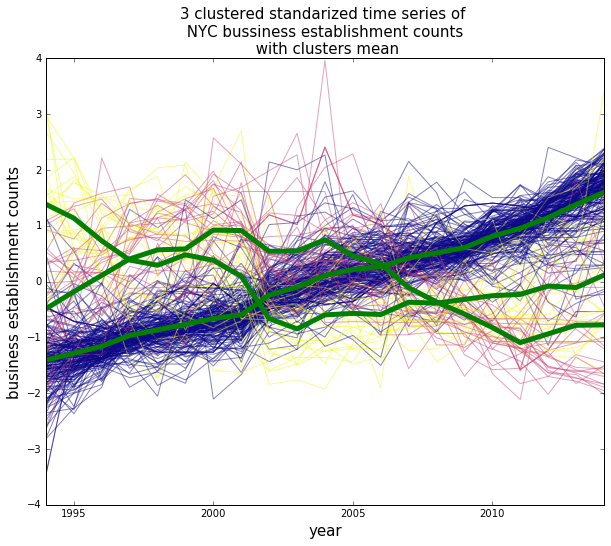

In [134]:
plt.figure(figsize = (10,8))
for i in range(len(time_series_stand)):
    t= clusters.labels_[i]
    plt.plot(np.arange(1994,2015) ,time_series_stand.iloc[i,:-1], alpha = 0.5, color=cmap[t][0:3])
    plt.title(
        '3 clustered standarized time series of \n NYC bussiness establishment counts \n with clusters mean',
        fontsize =15)
    plt.ylabel('business establishment counts',fontsize =15)
    plt.xlabel('year',fontsize =15)
    plt.xlim(1994,2014)
for i in range(n):
    plt.plot(np.arange(1994,2015) ,centroid.iloc[i],color = 'green',linewidth = 5)

In [136]:
time_series_stand

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est06,est07,est08,est09,est10,est11,est12,est13,est14,std_3
0,-1.650515,-1.607088,-1.259673,-1.154208,-0.893647,-0.738551,-0.533825,-0.540029,-0.198818,0.161004,...,0.198227,0.309896,0.266469,0.477400,0.831018,0.942687,1.420382,1.637516,1.693350,0
1,-0.974535,-1.248013,-1.794968,-1.065695,-0.974535,-1.339172,-1.202433,-0.518739,-0.062943,0.575171,...,0.484012,1.030967,0.529592,0.803069,0.620751,0.301694,1.167706,1.167706,1.577923,0
2,-0.118051,-0.234030,-1.379327,-1.248850,-1.248850,-1.161866,-1.161866,-1.292342,-0.465989,-0.393502,...,0.345867,0.838780,1.056241,0.650313,0.925765,0.838780,1.157723,1.578149,1.505662,0
3,3.212291,-0.444253,-0.785986,-1.161892,-0.991026,-0.512600,-0.649293,-0.512600,-0.854333,-0.717639,...,-0.205040,-0.136693,-0.205040,0.170867,0.546773,0.820159,1.161892,0.888506,0.956853,2
4,-1.332578,-1.549090,-1.454366,-0.926619,-1.102534,-0.967215,-0.507127,-0.222956,-0.222956,-0.114700,...,0.237132,0.358920,0.345388,0.507772,0.710751,1.170839,1.197903,1.671522,1.901566,0
5,-1.459619,-1.298191,-1.369219,-1.188420,-0.807449,-0.846192,-0.833278,-0.736421,-0.290878,-0.090707,...,0.445235,0.277349,0.561463,0.496892,0.806834,0.968262,1.168433,1.723747,1.788318,0
6,-0.189661,-0.189661,-0.664682,-1.212784,-1.103164,-1.432025,-0.847383,-0.481982,-1.212784,-1.139704,...,0.577682,0.248821,0.285361,0.248821,0.577682,1.454645,1.454645,1.600806,1.783507,0
7,-2.005640,-1.194027,-0.738385,-1.179788,-0.852295,-0.482086,-0.695668,-0.638713,-0.667190,-0.652952,...,0.528870,0.785169,0.358005,0.614303,0.728214,1.326244,0.984513,1.639498,1.440155,0
8,-1.554103,-1.484591,-1.345565,-0.963246,-0.789465,-0.407145,-0.163851,-0.998002,-0.511414,-0.163851,...,0.287981,0.183712,0.253224,0.148956,0.774569,1.156888,1.052619,1.539208,2.130065,0
9,-1.528453,-1.519285,-1.445940,-1.500948,-1.170897,-0.914190,-0.675820,-0.556634,-0.024885,0.204318,...,0.818580,0.690227,0.552705,0.818580,0.846084,1.020278,0.772740,1.121127,1.111959,0


In [139]:
data_and_zip['std_3'] = clusters.labels_

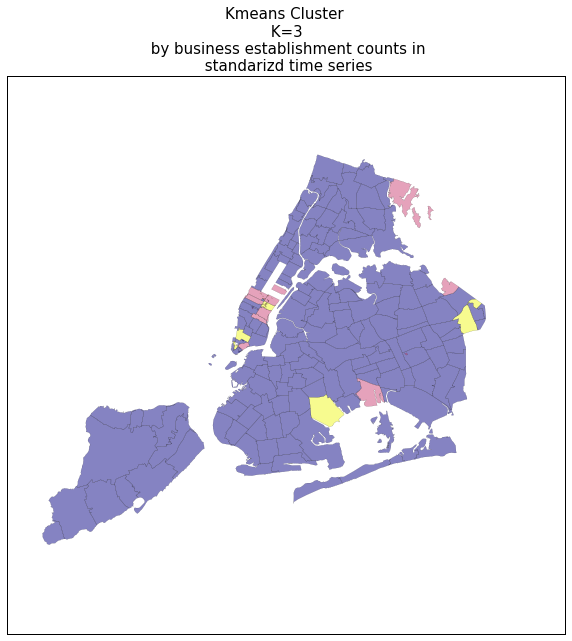

In [194]:
data_and_zip['std_3'] = clusters.labels_
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
data_and_zip.plot(column='std_3',cmap = 'plasma',alpha=0.5,linewidth=0.1,ax=ax)
plt.title("Kmeans Cluster \n K=3 \n by business establishment counts in\n standarizd time series",fontsize = 15)

### as 3 clustered standarized time series pattern is not much informative, try 4 clusters

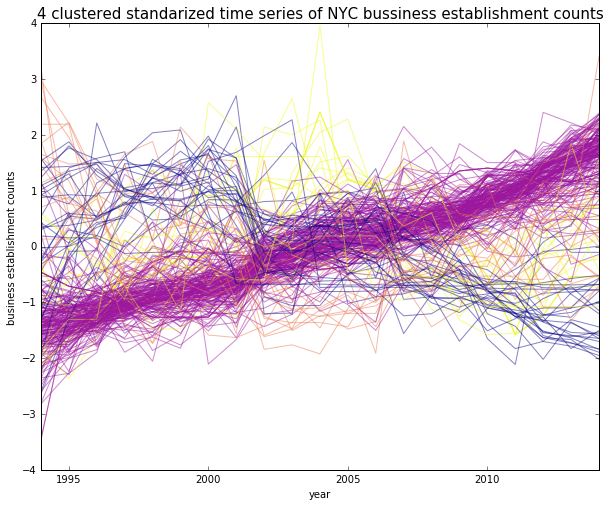

In [143]:
n = 4
clusters =KMeans(n_clusters= n).fit(time_series_stand)
cmap = plt.cm.plasma(np.linspace(0,1,n))
clusters.labels_

#plot with clusters
plt.figure(figsize = (10,8))
for i in range(len(time_series)):
    t= clusters.labels_[i]
    plt.plot(np.arange(1994,2015) ,time_series_stand.iloc[i,:21], color=cmap[t][0:3],alpha = 0.5)
    plt.title('4 clustered standarized time series of NYC bussiness establishment counts',fontsize =15)
    plt.ylabel('business establishment counts',fontsize =10)
    plt.xlabel('year',fontsize =10)
    plt.xlim(1994,2014)

In [144]:
time_series_stand['std_4'] = clusters.labels_

In [145]:
centroid = time_series_stand.groupby('std_4').mean()
centroid

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est06,est07,est08,est09,est10,est11,est12,est13,est14,std_3
std_4,,,,,,,,,,,,,,,,,,,,,
0,0.111768,0.506884,0.724867,0.899727,1.009363,1.055068,1.169734,0.875529,0.137188,0.102524,...,0.007255,-0.381629,-0.510684,-0.621264,-0.871843,-1.008051,-1.101585,-1.111203,-1.105419,1.285714
1,-1.407725,-1.285157,-1.160353,-0.974213,-0.867477,-0.774888,-0.671462,-0.599004,-0.269347,-0.126139,...,0.256829,0.425008,0.517096,0.622904,0.833204,0.978528,1.183905,1.415144,1.637143,0.000000
2,1.533764,1.049448,0.525469,0.012418,-0.117823,0.153987,-0.004806,-0.193144,-0.751190,-0.960436,...,-0.626871,-0.210113,-0.221131,-0.092263,0.016037,0.060467,0.303871,0.258318,0.549766,2.000000
3,-0.991180,-0.933853,-0.766163,-0.372157,-0.279810,-0.219006,0.266096,0.465885,0.785875,0.864196,...,0.553762,0.241957,-0.052657,-0.407818,-0.478988,-0.738786,-0.413422,0.006264,0.074820,0.705882


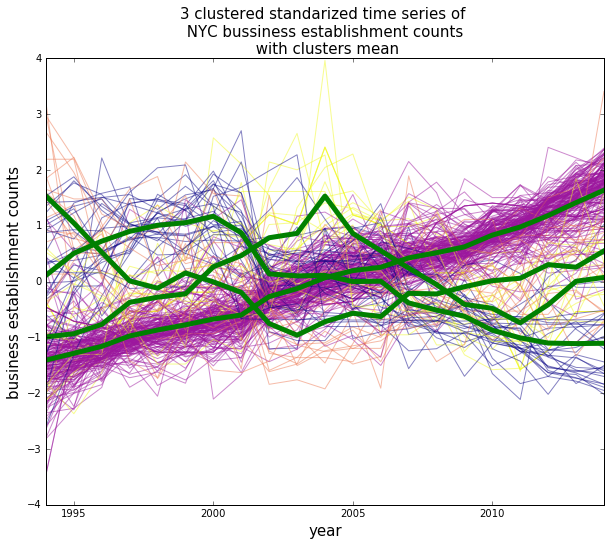

In [149]:
plt.figure(figsize = (10,8))
for i in range(len(time_series_stand)):
    t= clusters.labels_[i]
    plt.plot(np.arange(1994,2015) ,time_series_stand.iloc[i,:-2], alpha = 0.5, color=cmap[t][0:3])
    plt.title(
        '3 clustered standarized time series of \n NYC bussiness establishment counts \n with clusters mean',
        fontsize =15)
    plt.ylabel('business establishment counts',fontsize =15)
    plt.xlabel('year',fontsize =15)
    plt.xlim(1994,2014)
for i in range(n):
    plt.plot(np.arange(1994,2015) ,centroid.iloc[i,:21],color = 'green',linewidth = 5)

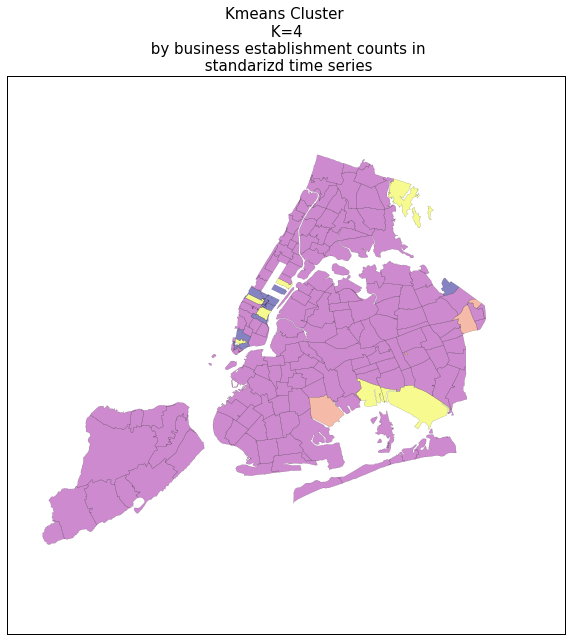

In [193]:
data_and_zip['std_4'] = clusters.labels_
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
data_and_zip.plot(column='std_4',cmap = 'plasma',alpha=0.5,linewidth=0.1,ax=ax)
plt.title("Kmeans Cluster \n K=4 \n by business establishment counts in\n standarizd time series",fontsize = 15)

### After standarized the time series, what I've learnt:
2 standarized maps above are so different from 3 maps without standarized time series.
Because without standarization, the clusters are based on counts. It could be more clear from time series plot. Different colors represents different clusters, means different counts scale belongs to different clusters.

However, after standarization, the time series lines are not clustered layer by layer. They are more common in trend. In 4 clusters standarized time series plot , it could be seen clear magenta lines have strong trend in continuous growing; yellow lines grows and then falls; pink lines falls and then grows, blue lines grows earlier and than falls.

So standarized map shows strongly the trend pattern. In map ,it is obvious that most place is growing continuously.

## agglomerative clustering

In [176]:
#standardized data

time_series_stand.index = data_and_zip.zip
time_series_stand.iloc[:,:-2].head()

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
zip,,,,,,,,,,,,,,,,,,,,,
11372,-1.650515,-1.607088,-1.259673,-1.154208,-0.893647,-0.738551,-0.533825,-0.540029,-0.198818,0.161004,...,0.272673,0.198227,0.309896,0.266469,0.477400,0.831018,0.942687,1.420382,1.637516,1.693350
11004,-0.974535,-1.248013,-1.794968,-1.065695,-0.974535,-1.339172,-1.202433,-0.518739,-0.062943,0.575171,...,0.438432,0.484012,1.030967,0.529592,0.803069,0.620751,0.301694,1.167706,1.167706,1.577923
11040,-0.118051,-0.234030,-1.379327,-1.248850,-1.248850,-1.161866,-1.161866,-1.292342,-0.465989,-0.393502,...,0.157401,0.345867,0.838780,1.056241,0.650313,0.925765,0.838780,1.157723,1.578149,1.505662
11426,3.212291,-0.444253,-0.785986,-1.161892,-0.991026,-0.512600,-0.649293,-0.512600,-0.854333,-0.717639,...,-0.205040,-0.205040,-0.136693,-0.205040,0.170867,0.546773,0.820159,1.161892,0.888506,0.956853
11365,-1.332578,-1.549090,-1.454366,-0.926619,-1.102534,-0.967215,-0.507127,-0.222956,-0.222956,-0.114700,...,0.183004,0.237132,0.358920,0.345388,0.507772,0.710751,1.170839,1.197903,1.671522,1.901566


In [184]:
Z = linkage(time_series_stand.iloc[:,:-2], 'complete')

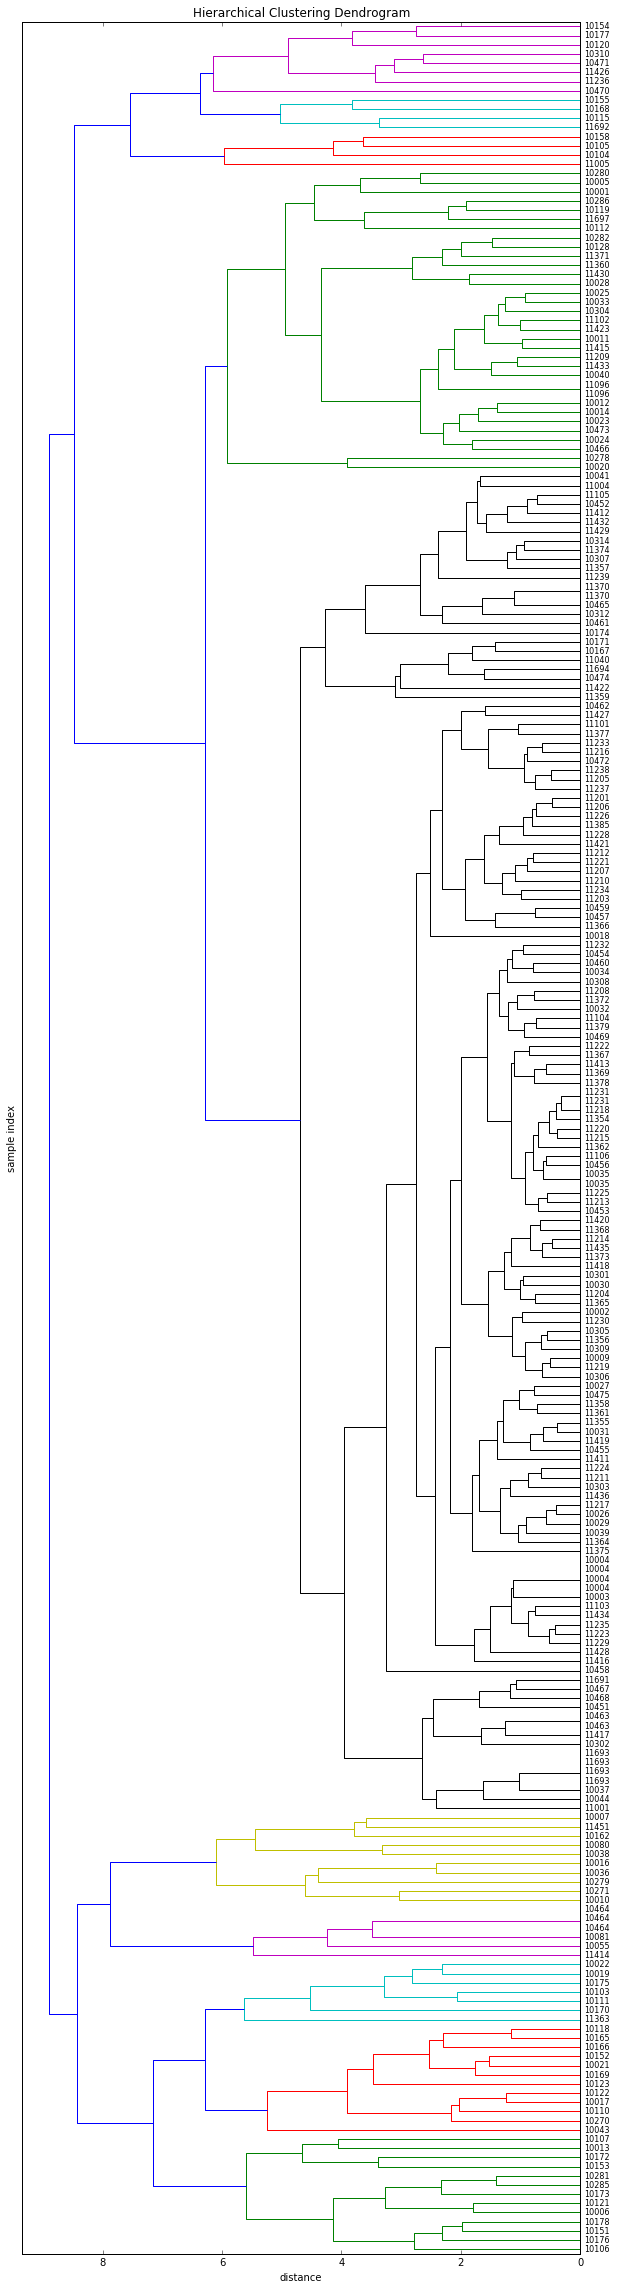

In [187]:
plt.figure(figsize=(10,40))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('sample index')
plt.xlabel('distance')
dendrogram(Z,
           orientation='left',
           leaf_font_size=8,
           labels = time_series_stand.index )    #leaf_rotation=90.,  # rotates the x axis labels
                                                    #leaf_font_size=8.,  # font size for the x axis labels
plt.show()

In [189]:
#set threshold distance as 8 
max_d = 8
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 1, 3, 3,
       2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 4, 2, 4, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1,
       1, 3, 1, 1, 3, 4, 1, 3, 4, 1, 1, 4, 2, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1,
       4, 3, 4, 3, 4, 1, 1, 2, 2, 1, 3, 1, 3], dtype=int32)

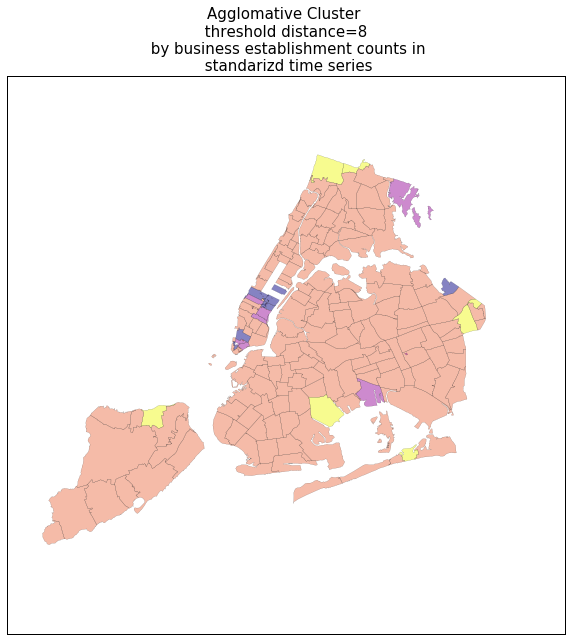

In [195]:
data_and_zip['agg'] = clusters
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
data_and_zip.plot(column='agg',cmap = 'plasma',alpha=0.5,linewidth=0.1,ax=ax)
plt.title("Agglomative Cluster \n threshold distance=8 \n by business establishment counts in\n standarizd time series",fontsize = 15)

Agglomative cluster and kmeans cluster for standarized data is similar, but not the same. Also in the process of agglomative cluster, when count the distance between each leaves, I used 'complete' here. If I use 'simple', 'average','centroid','ward' or any other method, the result could be different.
Refer here:https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

The same color area shows they are similar to each other from bottom up, not influenced by the the first centroid choice.  We can view the map this way: the majority are similar, so why some part are different? It is easy to understand uptown Manhattan and downtown Manhattan are special, and they are really likely to each other. But why partial midtown is quite different so that it formed a cluster itself(with two other far away near JFK and Bronx)? Also why there are some yellow spots in the map? What is special in those scattered yellow spot?

These questions could be further explored...
